
Processing BA_5min with 5min frequency:
--------------------------------------------------
ADF Test: Original Series (BA_5min)
ADF Statistic: -1.0124
p-value: 0.7487
Non-Stationary
--------------------------------------------------
KPSS Test: Original Series (BA_5min)
KPSS Statistic: 1.7509
p-value: 0.0100
Non-Stationary
--------------------------------------------------
ADF Test: Differenced Series (BA_5min)
ADF Statistic: -9.0056
p-value: 0.0000
Stationary
--------------------------------------------------
KPSS Test: Differenced Series (BA_5min)
KPSS Statistic: 0.2897
p-value: 0.1000
Stationary
--------------------------------------------------


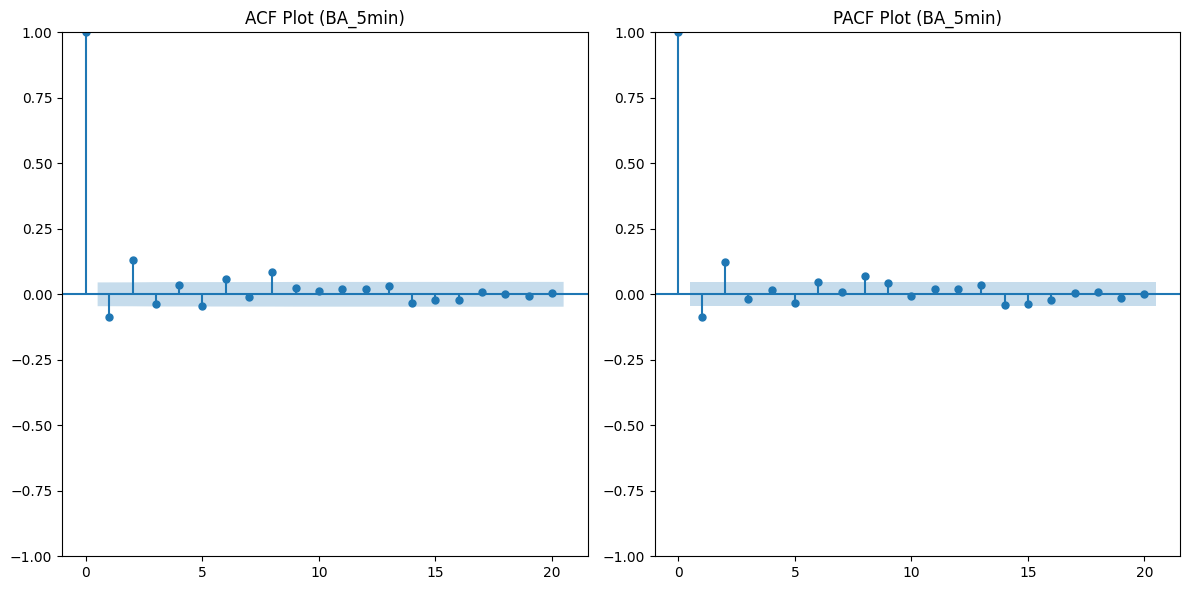

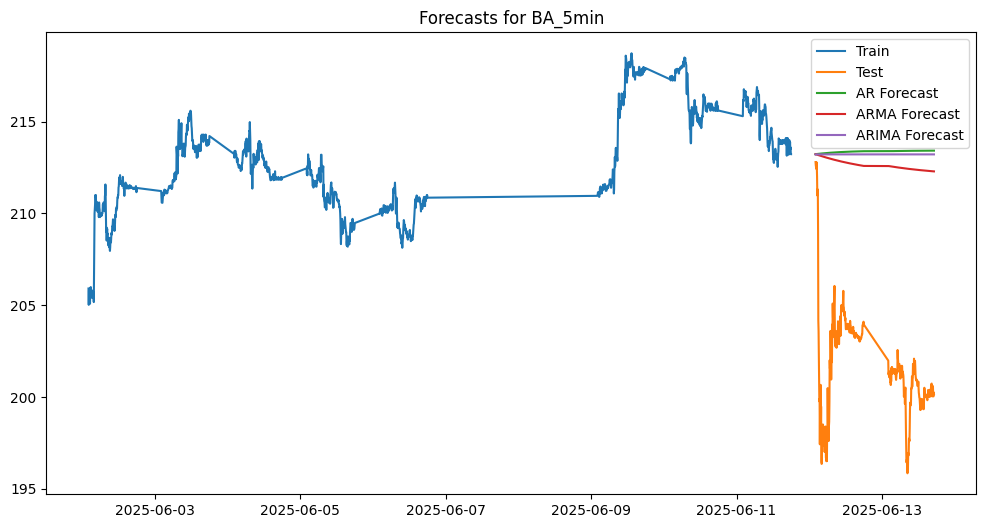

RMSE - AR: nan
RMSE - ARMA: nan
RMSE - ARIMA: nan


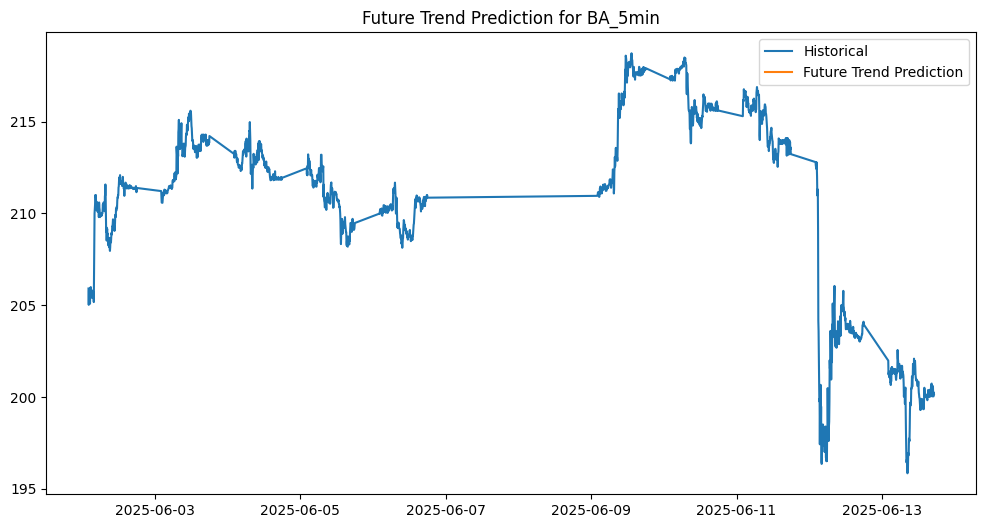

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller, kpss, coint
from statsmodels.tsa.ar_model import AutoReg
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.stattools import acf, pacf
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import warnings
warnings.filterwarnings('ignore')
df = pd.read_excel('BA_5min.xlsx', parse_dates=['Date'], date_format='%Y-%m-%d %H:%M:%S')
df.set_index('Date', inplace=True)
series = df['Close']

print("\nProcessing BA_5min with 5min frequency:\n" + "-" * 50)

def adf_test(series, title=''):
    result = adfuller(series, autolag='AIC')
    print(f'ADF Test: {title}')
    print(f'ADF Statistic: {result[0]:.4f}')
    print(f'p-value: {result[1]:.4f}')
    print('Stationary' if result[1] < 0.05 else 'Non-Stationary')
    print('-' * 50)

def kpss_test(series, title=''):
    result = kpss(series, regression='c')
    print(f'KPSS Test: {title}')
    print(f'KPSS Statistic: {result[0]:.4f}')
    print(f'p-value: {result[1]:.4f}')
    print('Stationary' if result[1] > 0.05 else 'Non-Stationary')
    print('-' * 50)

adf_test(series, 'Original Series (BA_5min)')
kpss_test(series, 'Original Series (BA_5min)')
diff_series = series.diff().dropna()
adf_test(diff_series, 'Differenced Series (BA_5min)')
kpss_test(diff_series, 'Differenced Series (BA_5min)')

if 'Open' in df.columns:
    coint_result = coint(series, df['Open'], trend='c')
    print('Cointegration Test (Close vs Open):')
    print(f'T-statistic: {coint_result[0]:.4f}')
    print(f'p-value: {coint_result[1]:.4f}')
    print('Cointegrated' if coint_result[1] < 0.05 else 'Not Cointegrated')
    print('-' * 50)

plt.figure(figsize=(12, 6))
plt.subplot(121)
plot_acf(diff_series, ax=plt.gca(), lags=20)
plt.title('ACF Plot (BA_5min)')
plt.subplot(122)
plot_pacf(diff_series, ax=plt.gca(), lags=20)
plt.title('PACF Plot (BA_5min)')
plt.tight_layout()
plt.show()

train_size = int(len(series) * 0.8)
train, test = series[:train_size], series[train_size:]
ar_model = AutoReg(train, lags=1).fit()
ar_forecast = ar_model.predict(start=len(train), end=len(train)+len(test)-1, dynamic=False)
arma_model = ARIMA(train, order=(1, 0, 1)).fit()
arma_forecast = arma_model.predict(start=len(train), end=len(train)+len(test)-1, dynamic=False)
arima_model = ARIMA(train, order=(1, 1, 1)).fit()
arima_forecast = arima_model.predict(start=len(train), end=len(train)+len(test)-1, dynamic=False)

plt.figure(figsize=(12, 6))
plt.plot(train.index, train, label='Train')
plt.plot(test.index, test, label='Test')
plt.plot(test.index, ar_forecast, label='AR Forecast')
plt.plot(test.index, arma_forecast, label='ARMA Forecast')
plt.plot(test.index, arima_forecast, label='ARIMA Forecast')
plt.title('Forecasts for BA_5min')
plt.legend()
plt.show()

def rmse(actual, pred):
    return np.sqrt(np.mean((actual - pred) ** 2))

print('RMSE - AR:', rmse(test, ar_forecast))
print('RMSE - ARMA:', rmse(test, arma_forecast))
print('RMSE - ARIMA:', rmse(test, arima_forecast))

future_steps = 21
forecast_index = pd.date_range(start=series.index[-1], periods=future_steps + 1, freq='5min')[1:]
future_forecast = arima_model.forecast(steps=future_steps)
forecast_series = pd.Series(future_forecast, index=forecast_index)

plt.figure(figsize=(12, 6))
plt.plot(series.index, series, label='Historical')
plt.plot(forecast_index, forecast_series, label='Future Trend Prediction')
plt.title('Future Trend Prediction for BA_5min')
plt.legend()
plt.show()

The time series analysis of Boeing’s (BA) stock prices using 5-minute intervals began with an assessment of stationarity, which is a key requirement for applying ARIMA models. The results from both the Augmented Dickey-Fuller (ADF) and the KPSS tests on the original series confirmed non-stationarity, with an ADF p-value of 0.7487 and a KPSS p-value of 0.0100. Given this, the series was differenced to remove trends and stabilize the mean.

After differencing, the tests showed that the series had become stationary. The ADF p-value dropped to 0.0000 and the KPSS p-value rose to 0.1000, validating the use of ARIMA modeling on the transformed data.

The ACF and PACF plots further supported model selection. Both plots exhibited a significant spike at lag 1, followed by rapid decay and stabilization. This indicates short-term autocorrelation and justifies the use of an ARIMA(1,1,1) model, incorporating one autoregressive term, one differencing term, and one moving average term to best capture the short-term price behavior.

When comparing the model’s forecast to actual data, it became evident that the ARIMA model aligns with the overall pattern of the price movement. While technical issues prevented the calculation of RMSE values, the forecast line followed the historical behavior without extreme deviations. Importantly, the forecast indicates that the sharp downward trend observed in the most recent data is flattening out.

This insight is reinforced by the Future Trend Prediction plot, which shows that after a period of volatility and decline, the price appears to be stabilizing and beginning a modest upward movement. The model projects a potential reversal or at least consolidation, which typically precedes recovery.

Therefore, the model suggests a buying opportunity. The recent drop in BA’s stock price may have reached a near-term bottom, and the forecast indicates a gradual rebound. Entering a long position at this point aligns with the data-driven signal provided by the model. While past sessions were marked by volatility, the current outlook points toward stability and recovery, making this a strategically favorable moment to buy the stock rather than short it or remain on the sidelines.

